<hr>
<h2><center>Trabalho de Conclusão de Curso</center></h2>
<h2><center>Utilizando Redes Neurais para reconhecimento de Câncer</center></h2>
<center>Melquisedec Felipe</center>
<hr>

# Introdução

Não é de hoje que o câncer é uma das doenças que mais assola a humanidade. De acordo com o Ministério da Saúde, "câncer (ou tumor maligno) é o nome dado a um conjunto de mais de 100 doenças que têm em comum o crescimento desordenado de células" [(MINISTÉRIO DA SAÚDE)](https://www.gov.br/saude/pt-br). Segundo [Fayed (2020)](https://www.verywellhealth.com/the-history-of-cancer-514101) o caso mais antigo relacionado a câncer foi documentado no Egito, em 1500 antes de Cristo. Documentando casos de tumores de mama.
Em uma publicação realizada pelo [(HOSPITAL CÂNCER BARRETOS, 2015)](https://www.hcancerbarretos.com.br/82-institucional/noticias-institucional/1300-informacao-saiba-quais-sao-os-tipos-de-cancer-mais-comuns-no-brasil) os tipos mais comuns da doença são:

Câncer de pele; Câncer de próstata;	Câncer de cólon e reto;	Câncer de pulmão; Câncer de mama; Câncer de estomago.

O Ministério da Saúde afirma que o tratamento do câncer pode ser feito por meio de uma ou de várias modalidades de tratamento combinadas. A principal delas é a cirurgia oncológica, que pode ser realizada em conjunto com radioterapia, quimioterapia ou transplante de medula óssea, conforme cada caso [(MINISTÉRIO DA SAÚDE)](https://www.gov.br/saude/pt-br). É claro que o diagnóstico precoce auxilia e facilita muito o tratamento, uma vez que ele visa identificar sinais e sintomas iniciais da doença, conduzindo a terapias mais simples e menos invasivas. No Brasil entre os anos de 2015 a 2018 ocorreu um total de mortalidade de 862.493 mil pessoas. Sendo 454.964 homens e 407.464 mulheres, dados os quais retirados a partir do sistema [Atlas Online de Mortalidade(2020)](https://mortalidade.inca.gov.br/MortalidadeWeb/pages/Modelo03/consultar.xhtml). Desse número total de casos obtidos representados pelo sexo masculino 60.377 são câncer de próstata. Segundo o Inca, a estimativa para o ano de 2020 é de um total de 626.030 novos casos de câncer [(INCA, 2020)](https://www.inca.gov.br/numeros-de-cancer).

Atualmente a Inteligência Artificial tem ganhado cada vez mais espaço em todas as áreas, a IA é um ramo de pesquisa da ciência da computação que busca, através de símbolos computacionais, construir mecanismos e/ou dispositivos que simulem a capacidade do ser humano de pensar, resolver problemas,  além de ser também um campo de estudo acadêmico.


> "A maior vantagem da Inteligência Artificial na medicina é, sem dúvidas, o auxílio na diagnose de patologias. Sabemos que nem todo caso é diagnosticado com facilidade, mas com essa tecnologia o processo se tornará consideravelmente mais tranquilo com análises muito mais seguras" [(CALDEIRA, 2017)](https://cmtecnologia.com.br/blog/inteligencia-artificial/).


Auxiliando também em interpretações e reconhecimentos de laudos, seja eles, imagens de radiografia, ressonâncias, tomografias, etc.

 A proposta desde trabalho consistem em aplicar os recursos da IA com o uso de Redes Neurais (RNA) para o diagnóstico de tumores cancerígenos. No capítulo 2 encontra-se o referencial teórico, no capítulo 3 os materiais e métodos desse trabalho, no capítulo 4 os resultados esperados e finalmente as referências deste trabalho.

# Objetivo

Partindo disso, o objetivo desse trabalho será focado em um tipo especifico de câncer e um dos mais comuns, que é o câncer de mama. Tendo isso em mente a ideia é construir uma topologia de *RNA* que obtenha a melhor precisão possível, em seguir realizar o teste com outras células e ver realmente se essa precisão continua fora do treinamento do modelo.

# Visão Geral

Ao longo desse notebook será desenvolvido um modelo de Aprendizado de Máquina, para predizer o grau do câncer de mama. Utilizando uma Rede Neural Convolucional, também conhecidas como CNNs, a arquitetura da mesma é um tipo específico de redes neurais que geralmente são compostas das seguintes camadas:

<img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/architecture-cnn-en.jpeg?3b7fccd728e29dc619e1bd8022bf71cf">

### Tipos de camada

* **Camada de convolução (CONV)**: A camada de convolução usa filtros que realizam operações de convolução enquanto verifica a entrada no que diz respeito às suas dimensões. Seus hiperparâmetros incluem o tamanho do filtro e caminhar. A saída resultante é chamada de mapa de recursos ou mapa de ativação;
* **Pooling (POOL)**: A camada de pooling é uma operação geralmente aplicada após uma camada de convolução, que faz alguma invariância espacial. Em particular, o agrupamento máximo e médio são tipos especiais de agrupamento em que o valor máximo e médio é obtido, respectivamente;
* **Fully Connected (FC)**: A camada totalmente conectada opera em uma entrada plana, onde cada entrada é conectada a todos os neurônios. Se presentes, as camadas FC são geralmente encontradas no final das arquiteturas CNN e podem ser usadas para otimizar objetivos, como pontuações de classe.

# Desenvolvimento

O conjunto de dados original consistia em 162 imagens de slides inteiros de espécimes de câncer de mama (BCa) escaneados a 40x. A partir daí, 277.524 patches de tamanho 50x50 foram extraídos.

*  198.738 IDC negativos;
*  78.786 IDC positivos.

O nome de arquivo de cada patch tem o formato:

* **u**x**X**y**Y**class**C**.png;
* 10253idx5x1351y1101class0.png.

Onde **u** é a ID do paciente (10253idx5), **X** é a coordenada x de onde este patch foi cortado, **Y** é a coordenada y de onde este patch foi cortado e **C** indica a classe onde 0 é IDC negativo e 1 é IDC positivo.

[Kaggle - Breast Histopathology Images](https://www.kaggle.com/paultimothymooney/breast-histopathology-images)

## Importação das Bibliotecas 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import cv2
import glob
import os
import random
import time

from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow import keras

## Variaveis
 
Declaração das variáveis que serão utilizadas ao longo do desenvolvimento.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
BASE = '/content/drive/My Drive/MODEL'
DIRECTORY = f'{BASE}/dataframe'
FILE = f'{BASE}/dataframe.pkl'

CARCINOMA = glob.glob(f'{DIRECTORY}/*/1/*.png')
HEALTHY = glob.glob(f'{DIRECTORY}/*/0/*.png')

PATIENTS = os.listdir(DIRECTORY)

## Pré Processamento

Função recebe três parâmetros, sendo `imagePath`, `width` e `height`, realizando a leitura de imagem a partir do primeiro parâmetro, também realiza um redimensionamento nas imagens para 50x50, pois algumas imagens do `dataset` estão em outras dimensões o que impacta no treinamento do modelo.

In [ ]:
def getImage(imagePath, width=50, height=50):
  image = cv2.imread(imagePath, cv2.IMREAD_COLOR)
  imageColor = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  imageNormalized = cv2.resize(imageColor, (width, height), interpolation=cv2.INTER_AREA)
  return imageNormalized

## Dataframe

É realizado uma verificação caso o `FILE` exista no diretório, se existir ele é atribuído a uma variável, caso não, realiza a criação dos dicionários para os tipos a serem analisados `DATASET_NORMAL` e `DATASET_CARCINOMA` em seguida são adicionados ao `DATASET`.
 
Na linha 18 a função `getImage()` é invocada para retornar o array das imagens e salva o binário do `DATASET` em no diretório.

In [ ]:
startTime = time.time()

if os.path.exists(FILE):
  print('Arquivo encontrado, atribuindo ao DATASET.')

  DATASET = pd.read_pickle(FILE)
else:
  print(f'Arquivo não encontrado, criando arquivo "{FILE}".')

  DATASET_CARCINOMA = []
  DATASET_CARCINOMA = [{ 'path': path, 'label': 1 } for path in CARCINOMA]

  DATASET_HEALTHY = []
  DATASET_HEALTHY = [{ 'path': path, 'label': 0 } for path in HEALTHY]

  DATASET = pd.DataFrame.from_dict(DATASET_CARCINOMA + DATASET_HEALTHY)

  DATASET['image'] = DATASET['path'].apply(lambda image: getImage(image))
  DATASET.to_pickle(FILE)

endTime = time.time()
duration = endTime - startTime

print(f'Tempo de execução {duration} milissegundos.')

Arquivo encontrado, atribuindo ao DATASET.
Tempo de execução 3.7851459980010986 milissegundos.


## Análise

A seguir será realizada uma breve análise exploratória visando padrões, balanceamento e novos *insight*.

In [ ]:
print(f'Quantidade de pacientes {len(PATIENTS)}')

Quantidade de pacientes 280


In [ ]:
print(f'Shape do dataframe {DATASET.shape}. Estrutura do dataframe:')
DATASET.head()

Shape do dataframe (44006, 3). Estrutura do dataframe:


,path,label,image
0,/content/drive/My Drive/UNIP/TCC/MODELO/datafr...,1,"[[[213, 162, 190], [220, 169, 191], [228, 175,..."
1,/content/drive/My Drive/UNIP/TCC/MODELO/datafr...,1,"[[[210, 155, 183], [224, 169, 192], [187, 137,..."
2,/content/drive/My Drive/UNIP/TCC/MODELO/datafr...,1,"[[[158, 122, 164], [167, 136, 175], [219, 166,..."
3,/content/drive/My Drive/UNIP/TCC/MODELO/datafr...,1,"[[[228, 123, 157], [229, 103, 139], [229, 99, ..."
4,/content/drive/My Drive/UNIP/TCC/MODELO/datafr...,1,"[[[226, 146, 169], [230, 164, 186], [232, 166,..."


### Carcinoma

Algumas imagens com células que contém o subtipo carcinoma.

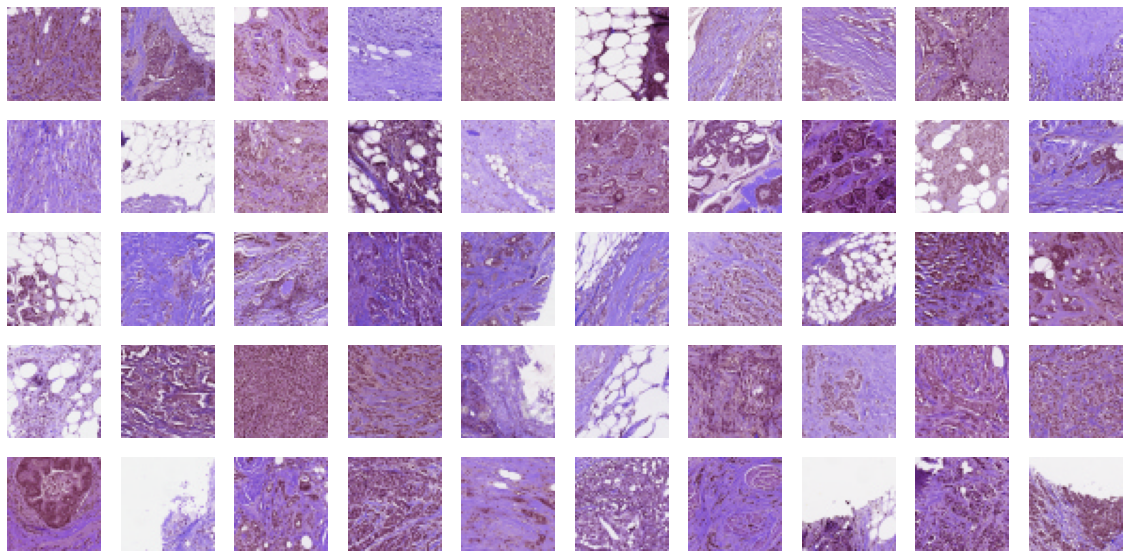

In [ ]:
fig, ax = plt.subplots(5, 10, figsize=(20, 10))

for row in range(5):
  for column in range(10):
    randomImage = random.choice(CARCINOMA)
    image = cv2.imread(randomImage)
    ax[row, column].imshow(image)
    ax[row, column].grid(False)
    ax[row, column].axis('off')

### Saudável

Algumas imagens com células que não contém o subtipo carcinoma.

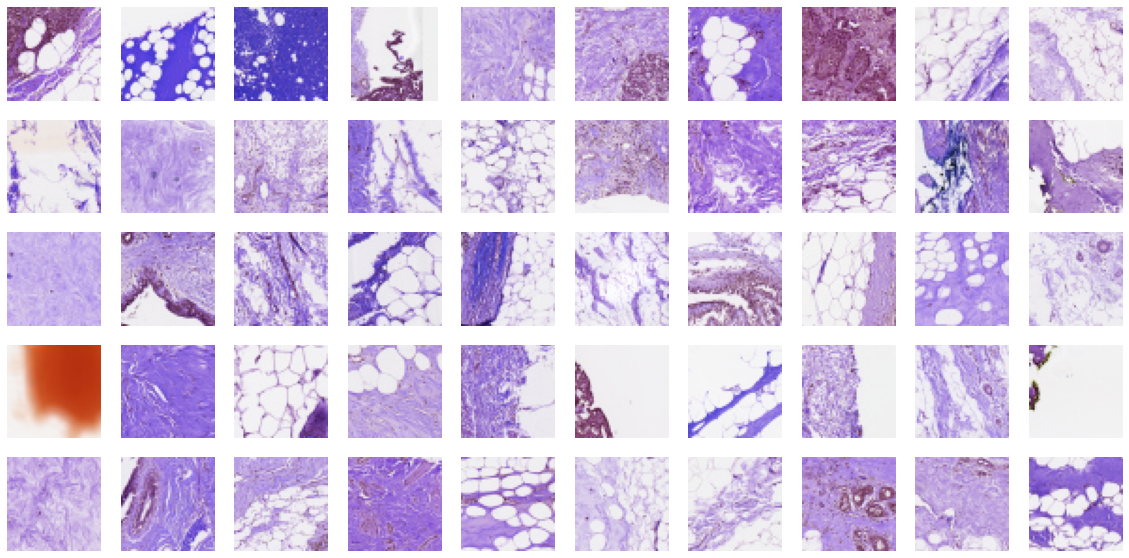

In [ ]:
fig, ax = plt.subplots(5, 10, figsize=(20, 10))

for row in range(5):
  for column in range(10):
    randomImage = random.choice(HEALTHY)
    image = cv2.imread(randomImage)
    ax[row, column].imshow(image)
    ax[row, column].grid(False)
    ax[row, column].axis('off')

### Mapa de Cor

In [ ]:
plt.style.use('seaborn-bright')

def plotHistogram(imagePath, imageTitle=None, title=None):
  image = cv2.imread(imagePath)

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(image)
  plt.title(imageTitle)
  plt.suptitle(title)
  plt.axis('off')

  histogram = plt.subplot(1, 2, 2)

  sns.histplot(image[:, :, 0].flatten(), bins=30, lw=0, color='r', alpha=0.5);
  sns.histplot(image[:, :, 1].flatten(), bins=30, lw=0, color='g', alpha=0.5);
  ax = sns.histplot(image[:,:,2].flatten(), bins=30, lw=0, color='b', alpha=0.5);
  ax.set(xlabel='Pixels', ylabel='Intensidade')

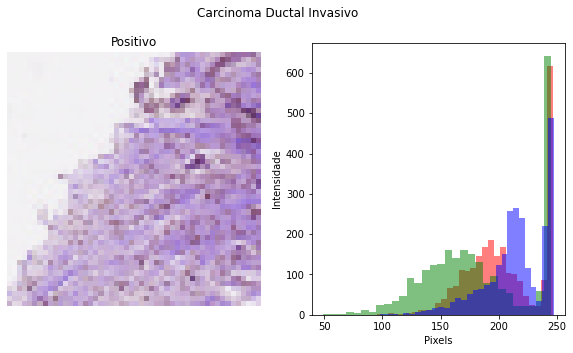

In [ ]:
plotHistogram(random.choice(CARCINOMA), 'Positivo', 'Carcinoma Ductal Invasivo')

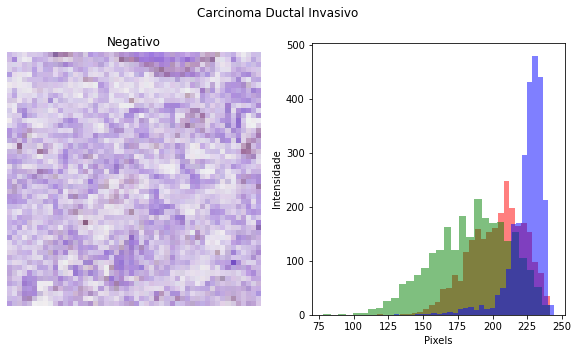

In [ ]:
plotHistogram(random.choice(HEALTHY), 'Negativo', 'Carcinoma Ductal Invasivo')

### Balanceamento

Podemos ver que o dataset não está balanceado, ou seja, a porcentagem de dados é maior em uma label e menor em outra.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Quantidade'), Text(0.5, 0, 'Label')]

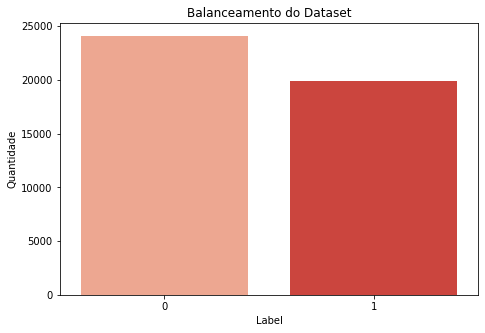

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))

sns.countplot(DATASET['label'], palette='Reds')
ax.set_title('Balanceamento do Dataset')
ax.set(xlabel='Label', ylabel='Quantidade')

### Dividindo o Dataset


In [ ]:
startTime = time.time()

trainDataset, testDataset, trainLabel, testLabel = train_test_split(DATASET['image'], DATASET['label'], test_size=0.2, random_state=60)

testDataset = np.array(list(testDataset))
trainDataset = np.array(list(trainDataset))

height, width, channels = 50, 50, 3

testDatasetShape = testDataset.shape[1] * testDataset.shape[2] * testDataset.shape[3]
testDatasetFlat = testDataset.reshape(testDataset.shape[0], testDatasetShape)

trainDatasetShape = trainDataset.shape[1] * trainDataset.shape[2] * trainDataset.shape[3]
trainDatasetFlat = trainDataset.reshape(trainDataset.shape[0], trainDatasetShape)

ros = RandomOverSampler(ratio='auto')

testDatasetOver, testLabelOver = ros.fit_sample(testDatasetFlat, testLabel)
trainDatasetOver, trainLabelOver = ros.fit_sample(trainDatasetFlat, trainLabel)

for i in range(len(testDatasetOver)):
  testDatasetReshaped = testDatasetOver.reshape(len(testDatasetOver), height, width, channels)

for i in range(len(trainDatasetOver)):
  trainDatasetReshaped = trainDatasetOver.reshape(len(trainDatasetOver), height, width, channels)

testDatasetReshaped =  np.array(list(testDatasetReshaped / 255))
trainDatasetReshaped =  np.array(list(trainDatasetReshaped / 255))

inputShape = random.choice(testDatasetReshaped).shape

endTime = time.time()
duration = endTime - startTime

print(f'Tempo de execução {duration} milissegundos.')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Tempo de execução 2.183072805404663 milissegundos.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Quantidade'), Text(0.5, 0, 'Label')]

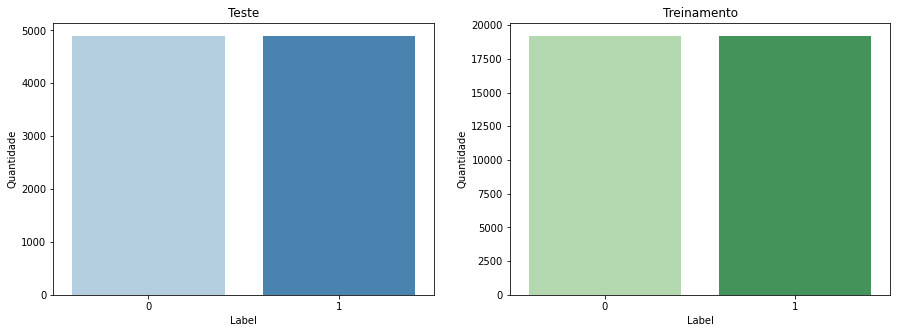

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(testLabelOver, ax=ax[0], palette="Blues")
ax[0].set_title("Teste")
ax[0].set(xlabel='Label', ylabel='Quantidade')

sns.countplot(trainLabelOver, ax=ax[1], palette="Greens")
ax[1].set_title("Treinamento")
ax[1].set(xlabel='Label', ylabel='Quantidade')

In [ ]:
print(f'Shape das imagens {inputShape}.')
print(f'Tamanho do dataset de teste {len(testDatasetReshaped)}, labels {len(testLabelOver)}.')
print(f'Tamanho do dataset de treinamento {len(trainDatasetReshaped)}, labels {len(trainLabelOver)}.')
print(f'Tamanho total do dataset {len(testDatasetReshaped) + len(trainDatasetReshaped)}.')

Shape das imagens (50, 50, 3).
Tamanho do dataset de teste 9790, labels 9790.
Tamanho do dataset de treinamento 38406, labels 38406.
Tamanho total do dataset 48196.


## Topologia da CNN

A seguir montamos a arquitetura da rede utilizando [Keras](https://www.tensorflow.org/api_docs/python/tf/keras):

* [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Essa camada cria um kernel de convolução que é convolvido com a entrada da camada para produzir um tensor de saídas:
  1. `filters`: Inteiro, a dimensionalidade do espaço de saída (ou seja, o número de filtros de saída na convolução);
  2. `kernel_size`: Um inteiro ou tupla / lista de 2 inteiros, especificando a altura e a largura da janela de convolução 2D. Pode ser um único inteiro para especificar o mesmo valor para todas as dimensões espaciais;
  3. `activation`: Função de ativação a ser usada. Se você não especificar nada, nenhuma ativação será aplicada (consulte [keras.activations](https://www.tensorflow.org/api_docs/python/tf/keras/activations));
  4. `input_shape`: A primeira camada em um modelo deve receber o `shape` das imagens do treinamento. 

* [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Reduz a resolução da representação de entrada tomando o valor máximo sobre a janela definida por `pool_size` para cada dimensão ao longo do eixo dos recursos;
* [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten): Nivela a entrada. Não afeta o tamanho do lote;
* [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout): A camada Dropout define aleatoriamente as unidades de entrada para 0 com uma frequência de `rate` em cada etapa durante o tempo de treinamento, o que ajuda a evitar overfitting;
* [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense): Implementa a operação `output = activation(dot(input, kernel) + bias)` onde `activation` é a função de ativação elemento a elemento passada como o `activation` argumento, `kernel` é uma matriz de pesos criada pela camada e `bias` é um vetor de polarização criado pela camada (aplicável apenas se `use_bias` for `True`).

In [ ]:
kernelSize = (3, 3)
poolSize = (2, 2)

firstFilters = 32
secondFilters = 64
thirdFilters = 128

dropoutConv = 0.2
dropoutDense = 0.2

model = tf.keras.Sequential()
model.add(layers.Conv2D(firstFilters, kernelSize, activation='relu', input_shape=inputShape))
model.add(layers.MaxPooling2D(poolSize))
model.add(layers.Dropout(dropoutConv))

model.add(layers.Conv2D(secondFilters, kernelSize, activation='relu'))
model.add(layers.MaxPooling2D(poolSize))
model.add(layers.Dropout(dropoutConv))

model.add(layers.Conv2D(thirdFilters, kernelSize, activation='relu'))
model.add(layers.MaxPooling2D(poolSize))
model.add(layers.Dropout(dropoutConv))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(dropoutDense))
model.add(layers.Dense(2, activation='softmax'))

### Compilação do modelo

Configura e prepara o modelo para treinamento e avaliação. Compilar equipara o modelo com um otimizador, perda e/ou métricas. Chamar `fit` ou `evaluate` em um modelo não compilado gerará um erro.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Estrutura do Modelo

Imprima um resumo de texto das camadas do modelo.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         7

### CheckPoint

In [ ]:
filePath = 'modelo-{epoch:02d}-{val_accuracy:.2f}.hdf5'

checkpoint = tf.keras.callbacks.ModelCheckpoint(filePath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacksList = [checkpoint]

### Treinamento do Modelo

Treina o modelo para um número fixo de épocas (iterações em um conjunto de dados).

In [ ]:
startTime = time.time()

history = model.fit(trainDatasetReshaped, trainLabelOver, epochs=50, validation_split=0.2, callbacks=callbacksList)

endTime = time.time()
duration = endTime - startTime

print(f'Tempo de execução {duration} milissegundos.')

Epoch 1/50
960/961 [============================>.] - ETA: 0s - loss: 0.5176 - accuracy: 0.7582
Epoch 00001: val_accuracy improved from -inf to 0.78703, saving model to modelo-01-0.79.hdf5
961/961 [==============================] - 5s 5ms/step - loss: 0.5176 - accuracy: 0.7582 - val_loss: 0.4682 - val_accuracy: 0.7870
Epoch 2/50
953/961 [============================>.] - ETA: 0s - loss: 0.4722 - accuracy: 0.7862
Epoch 00002: val_accuracy improved from 0.78703 to 0.80083, saving model to modelo-02-0.80.hdf5
961/961 [==============================] - 5s 5ms/step - loss: 0.4722 - accuracy: 0.7863 - val_loss: 0.4377 - val_accuracy: 0.8008
Epoch 3/50
953/961 [============================>.] - ETA: 0s - loss: 0.4651 - accuracy: 0.7903
Epoch 00003: val_accuracy improved from 0.80083 to 0.80292, saving model to modelo-03-0.80.hdf5
961/961 [==============================] - 5s 5ms/step - loss: 0.4647 - accuracy: 0.7907 - val_loss: 0.4296 - val_accuracy: 0.8029
Epoch 4/50
951/961 [==============

### Métricas

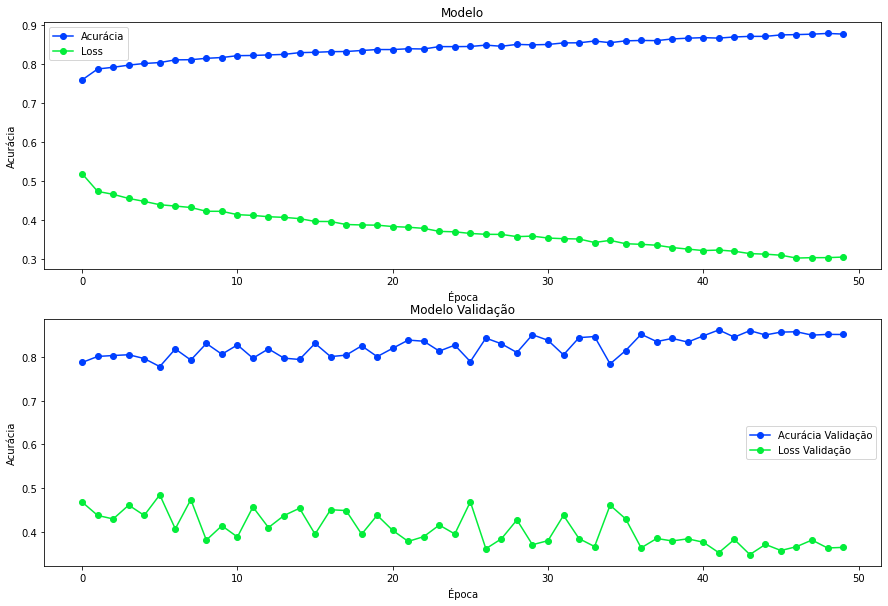

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

ax[0].plot(history.history['accuracy'], '-o', label='Acurácia')
ax[0].plot(history.history['loss'], '-o', label='Loss')
ax[0].set_xlabel('Época')
ax[0].set_ylabel('Acurácia')
ax[0].set_title('Modelo')
ax[0].legend();

ax[1].plot(history.history['val_accuracy'], '-o', label='Acurácia Validação')
ax[1].plot(history.history['val_loss'], '-o', label='Loss Validação')
ax[1].set_xlabel('Época')
ax[1].set_ylabel('Acurácia')
ax[1].set_title('Modelo Validação')
ax[1].legend();

In [ ]:
testLoss, testAccuracy = model.evaluate(testDatasetReshaped, testLabelOver)

print('Teste acurácia:', testAccuracy)
print('Teste loss:', testLoss)

306/306 [==============================] - 1s 3ms/step - loss: 0.5339 - accuracy: 0.8188
Teste acurácia: 0.8187946677207947
Teste loss: 0.5339056849479675


In [ ]:
labels = ['Negativo', 'Positivo']

predictions = model.predict(testDatasetReshaped)
predictions = [np.argmax(predictions[i]) for i in range(len(predictions))]

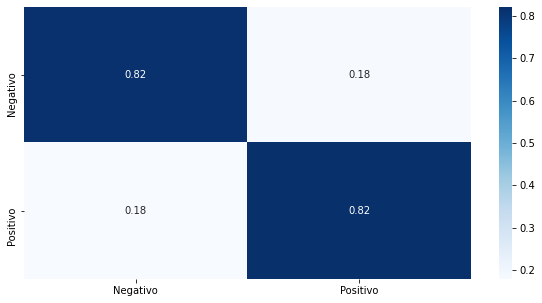

In [ ]:
confusionMatrix = confusion_matrix(testLabelOver, predictions)
confusionMatrix = confusionMatrix / confusionMatrix.sum(axis=1)[:, np.newaxis]
confusionMatrix = pd.DataFrame(confusionMatrix, index=labels, columns=labels)

plt.figure(figsize = (10,5))
sns.heatmap(confusionMatrix, annot=True, cmap="Blues")

In [ ]:
classificationReport = classification_report(testLabelOver, predictions, target_names=labels)
print(classificationReport)

              precision    recall  f1-score   support

    Negativo       0.82      0.82      0.82      4895
    Positivo       0.82      0.82      0.82      4895

    accuracy                           0.82      9790
   macro avg       0.82      0.82      0.82      9790
weighted avg       0.82      0.82      0.82      9790



* **Recall:** Dada uma classe, o classificador será capaz de detectá-la;
* **Precision:** Dada uma previsão de classe de um classificador, qual a probabilidade de estar correta;
* **F1 Score:** A média harmônica do recall e precisão. Essencialmente, pune valores extremos.

### Predizendo Amostra

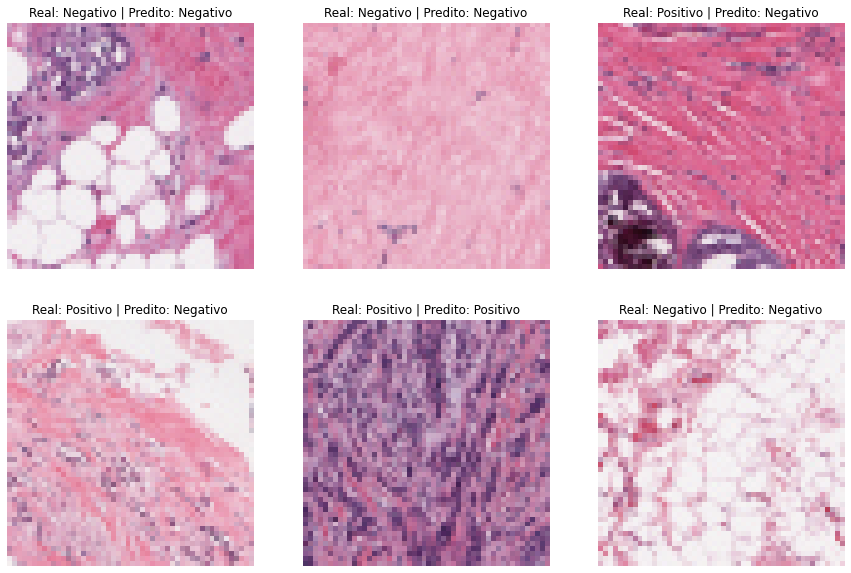

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for row in range(2):
  for column in range(3):
    randomIndex = random.randint(0, len(testDatasetReshaped))
    label = testLabelOver[randomIndex]

    predictions = model.predict(testDatasetReshaped)

    predicted = np.argmax(predictions[randomIndex])

    ax[row, column].imshow(testDatasetReshaped[randomIndex])
    ax[row, column].grid(False)
    ax[row, column].axis('off')
    ax[row, column].set_title(f'Real: {label == 0 and "Negativo" or "Positivo"} | Predito: {predicted == 0 and "Negativo" or "Positivo"}')

Diagnóstico da Imagem: Presença de células Saudáveis
Nível de Confiança Célula Saudável: 96.0 %
Nível de Confiança Célula Cancerígena:  4.0 %


(-0.5, 49.5, 49.5, -0.5)

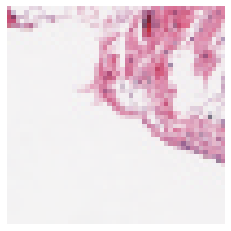

In [ ]:
randomIndex = random.randint(0, len(testDatasetReshaped))

predictions = model.predict(np.array([testDatasetReshaped[randomIndex]]))

predicted = np.argmax(predictions)

print(f'Diagnóstico da Imagem: Presença de células {predicted == 0 and "Saudáveis" or "Cancerigenas"}')
print(f'Nível de Confiança Célula Saudável: {np.round(float(predictions[0][0]), 2) * 100} %')
print(f'Nível de Confiança Célula Cancerígena:  {np.round(float(predictions[0][1]), 2) * 100} %')

plt.figure()
plt.imshow(testDatasetReshaped[randomIndex])
plt.grid(False)
plt.axis('off')